In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings as w 
w.filterwarnings('ignore')
sns.set(style='whitegrid')

In [22]:
df = pd.read_csv('../artifacts/raw.csv',sep=';')

In [23]:
df.shape

(45211, 17)

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df.describe(include='number')

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
x= df[df['duration']<2]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
31740,39,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no


In [6]:
for x in df.select_dtypes(include=['object']).columns:
    print(df[x].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  

#### Encoding `y`<br>
`yes` = `1`<br>
`no` = `0`<br>

In [7]:
df['y']= df['y'].map({'yes':1, 'no':0})
print(df.y.value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


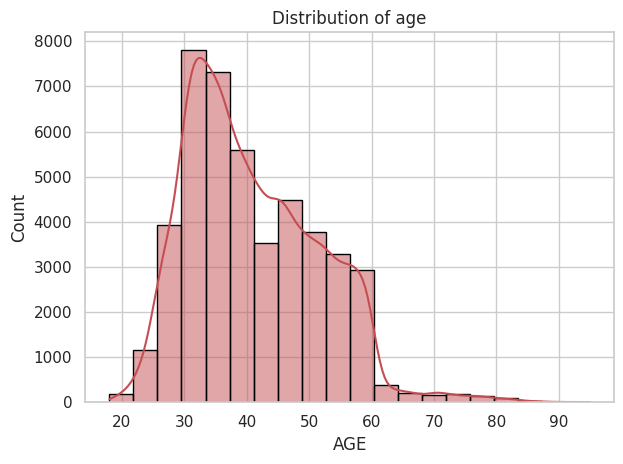

In [8]:
sns.histplot(df['age'],kde=True, edgecolor='black', bins=20 ,color='r')
plt.title('Distribution of age')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

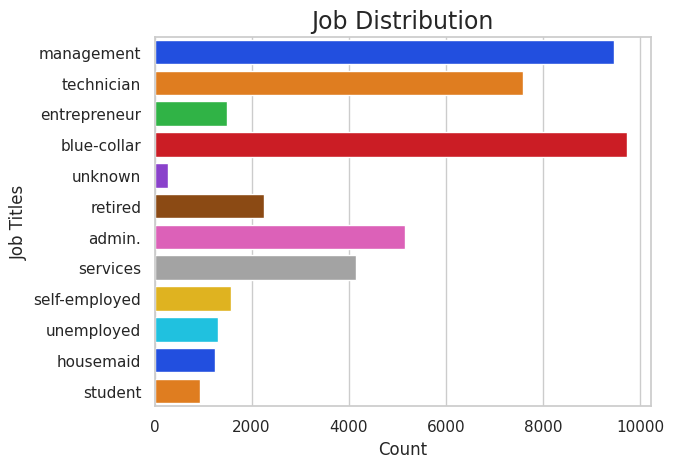

In [9]:
sns.countplot(df['job'], palette='bright')
plt.title('Job Distribution', fontsize=17)
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.show()

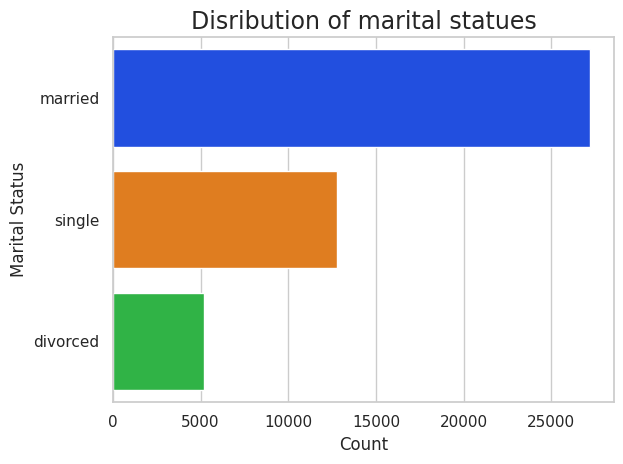

In [10]:
sns.countplot(df['marital'], palette='bright')
plt.title('Disribution of marital statues', fontsize= 17)
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()


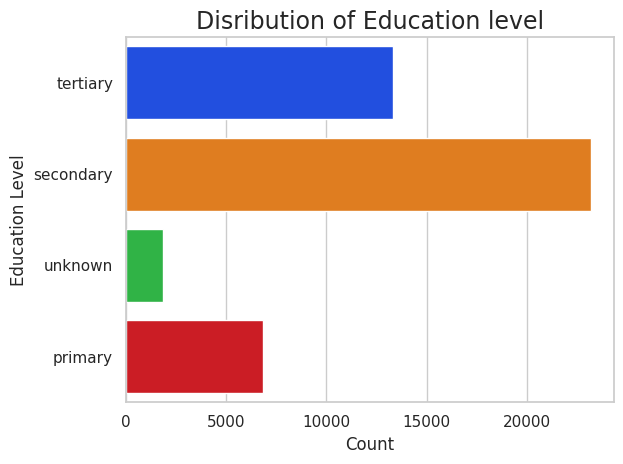

In [11]:
sns.countplot(df['education'], palette='bright')
plt.title('Disribution of Education level', fontsize= 17)
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


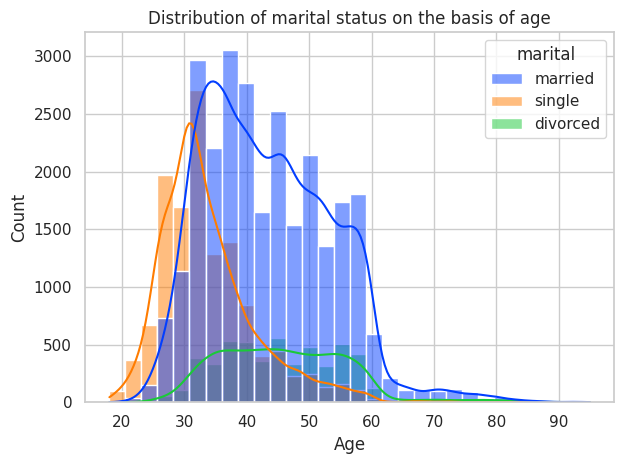

In [12]:
sns.histplot(x='age', hue='marital', data=df, kde=True , bins=30, palette='bright')
plt.title('Distribution of marital status on the basis of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

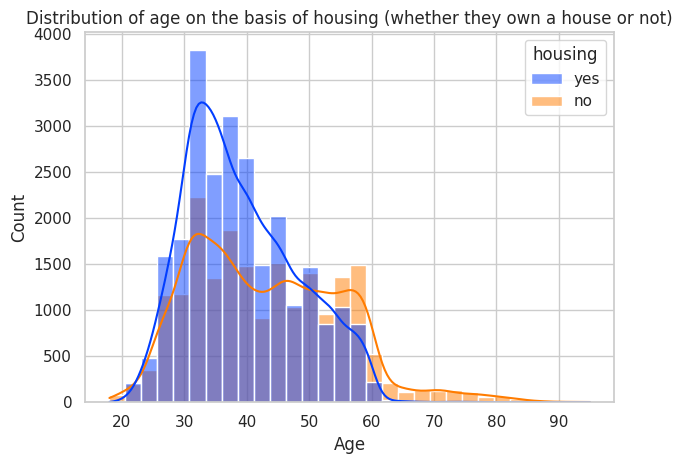

In [13]:
sns.histplot(x='age', hue= 'housing', data= df, bins= 30, palette= 'bright', kde= True)
plt.title('Distribution of age on the basis of housing (whether they own a house or not)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

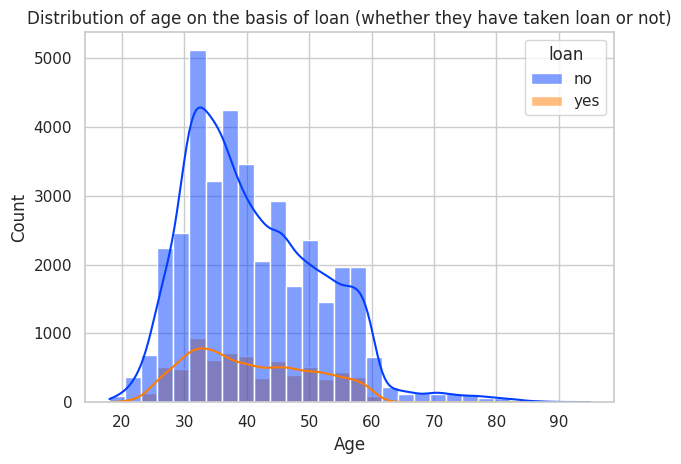

In [14]:
sns.histplot(x='age', hue= 'loan',data= df ,kde= True, bins= 30, palette= 'bright')
plt.title('Distribution of age on the basis of loan (whether they have taken loan or not)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

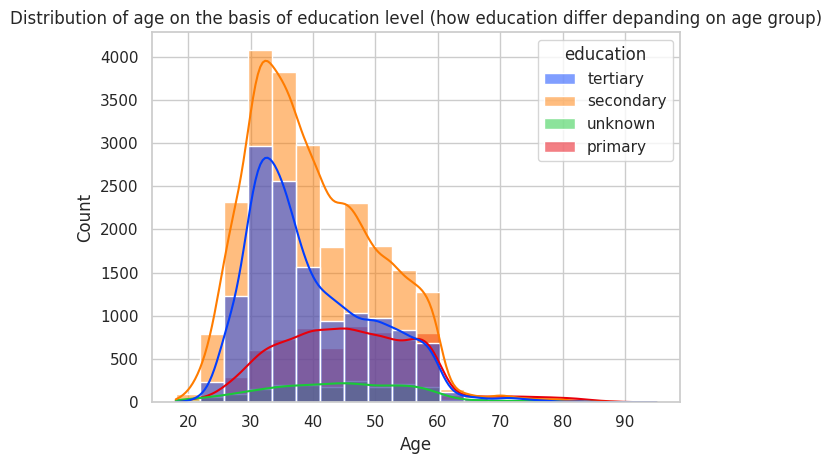

In [15]:
sns.histplot(x= 'age', data= df, kde= True, hue= 'education', palette= 'bright', bins= 20)
plt.title('Distribution of age on the basis of education level (how education differ depanding on age group)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

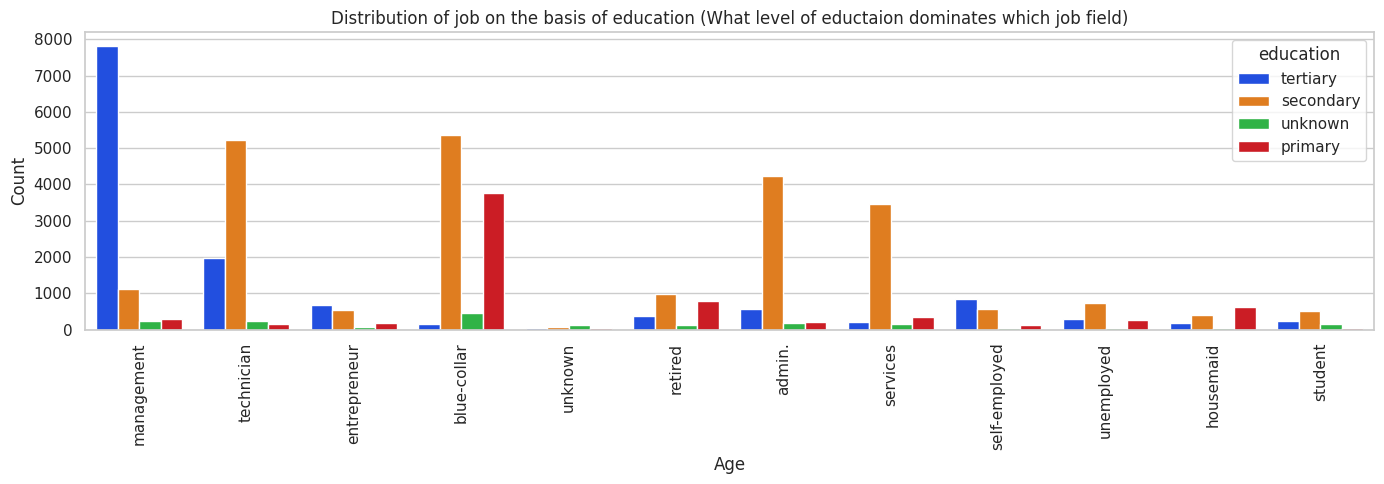

In [16]:
plt.figure(figsize=(14,5))
sns.countplot(x='job', hue= 'education', data= df, palette= 'bright')
plt.title('Distribution of job on the basis of education (What level of eductaion dominates which job field)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

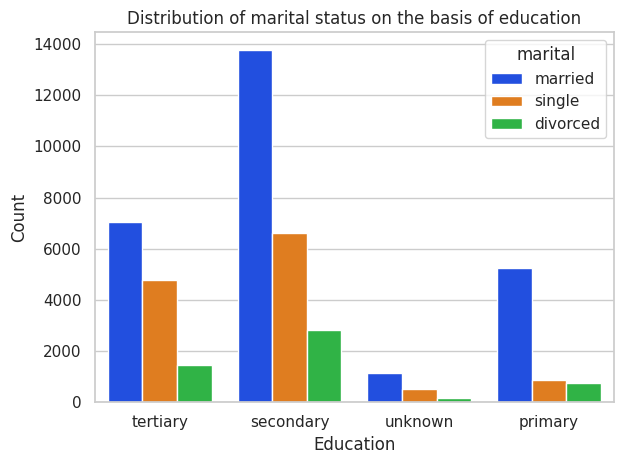

In [17]:
sns.countplot(x='education', hue= 'marital', palette= 'bright', data= df)
plt.title('Distribution of marital status on the basis of education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

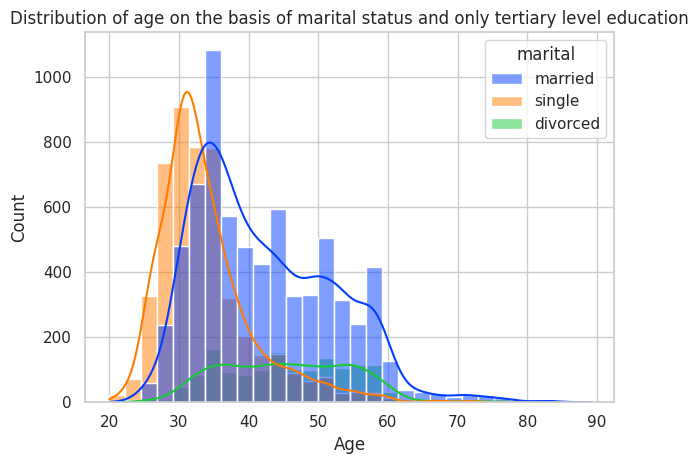

In [18]:
sns.histplot(data= df[df['education']=='tertiary'], x='age', hue= 'marital', palette= 'bright', kde= True, bins= 30)
plt.title('Distribution of age on the basis of marital status and only tertiary level education')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

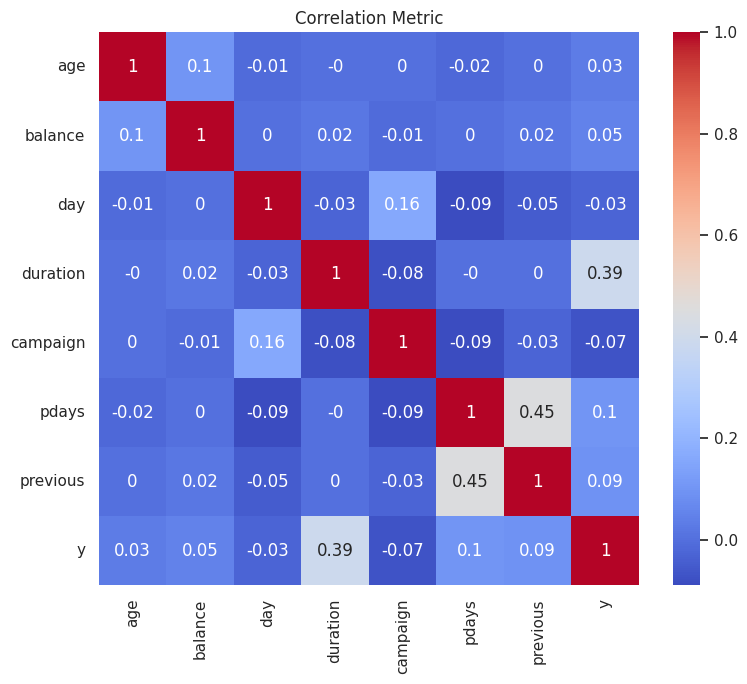

In [19]:
df_num = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,7))
corr_matrix= df_num.corr().round(2)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Metric')
plt.tight_layout()
plt.show()